<a href="https://colab.research.google.com/github/A01749373/RetoRealEstate/blob/main/Reto_Real_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto Real State

- *Juan Carlos Varela Tellez      A01367002*
- *Alan Eduardo Aquino Rosas      A01366912*
- *Jorge Chávez Badillo           A01749448*
- *Amy Murakami Tsutsumi          A01750185*
- *Ariadna Jocelyn Guzmán Jiménez A01749373*

## Introducción

Hoy en día, el mercado de bienes raíces está descontrolado y se encuentra en una burbuja inmobiliaria, con precios a la alza que en cualquier momento puede bajar de forma extraordinaria. 

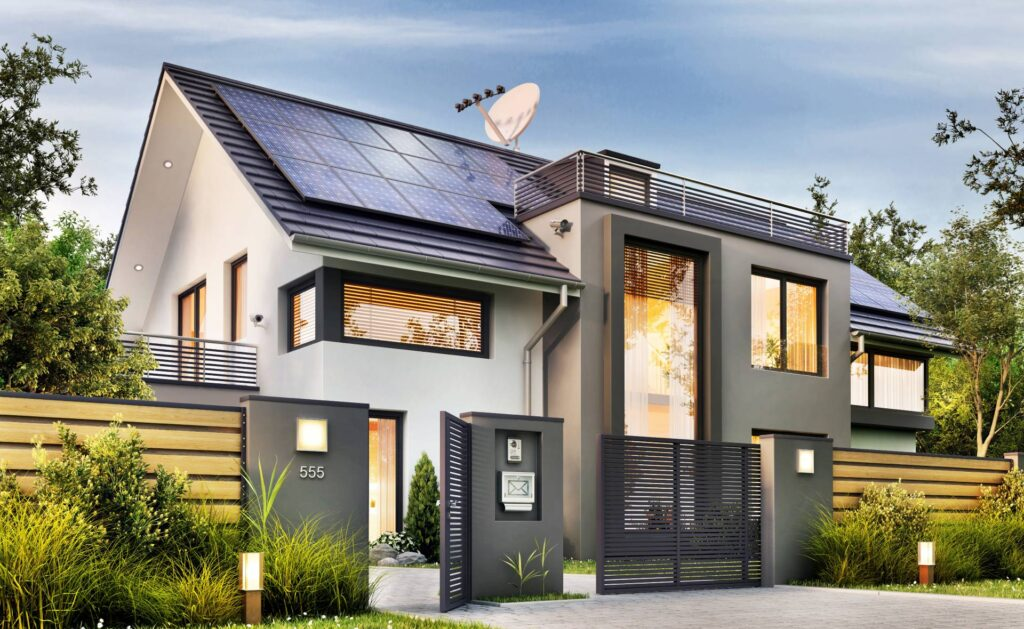

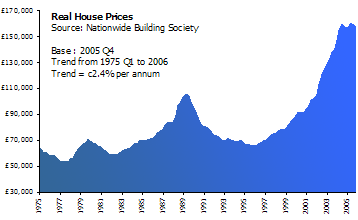

Esta alza en los precios es preocupante debido a que pueden bajar de forma repentina y crashear el mercado.  
Esto conlleva a precios subestimados para todos, que causa inestabilidad y miedo en los compradores.  
Para saber el precio verdadero de una casa y poder predecirlo de forma confiable, podemos utilizar modelos supervisados de inteligencia artificial. Esto ayudaría a que esta problemática se mitigue.

## Lectura de Datos

In [ ]:
#Se conecta este Notebook con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para poder leer, procesar y analizar los datos e información que sacaremos de dichos datos es necesario importar ciertas bibliotecas que nos ayudarán de forma importante: 

- Pandas: Esta biblioteca nos ayuda a leer nuestros datos, al igual que modificar nuestros datos a traves de un data-frame para manipularlos y analizarlos. Para más información haz click [aquí](https://pandas.pydata.org/).
- Numpy: Esta biblioteca nos da diferentes herramientas matematicas vectorizadas para acelerar nuestros calculos. Para más información haz click [aquí](https://numpy.org/).
- Matplotlib: esta biblioteca nos da la posibilidad de crear diferentes tipos de gráficos con mucha personalización. Para más información haz click [aqui](https://matplotlib.org/).
- Seaborn: Esta biblioteca también nos da herramientas para poder graficar y visualizar datos, sin embargo, es para uso rápido ya que tiene muchas plantillas que podemos utilizar. Para más información haz click [aquí](https://seaborn.pydata.org/).
- Scikit-learn: Esta biblioteca es de las más importantes que se utiliza ya que contiene la gran mayoría de herramientas de machine learning que se van a utilizar en este reto, desde regresiones hasta bosques aleatorios. Para más información haz click [aqui](https://scikit-learn.org/stable/).
- Graphviz: Esta biblioteca nos ayuda a imprimir diagramas que se van a utilizar más adelante en este notebook. Para más información haz click [aquí](https://graphviz.org/).

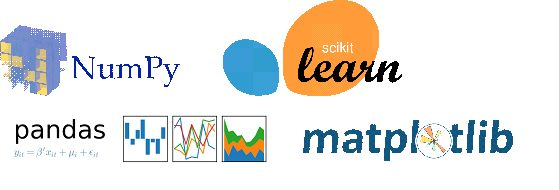

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix 
from sklearn import tree
import graphviz

Ahora vamos a obtener nuestros datos de nuestro data-set.
Nuestro archivo ```realState.csv``` tiene varias características y cuenta con la variable dependiente que se va a utilizar para nuestro conjunto de entrenamiento y validación para los datos.  

In [ ]:
path = "/content/drive/Shareddrives/Reto Real State/Datasets/"
real_state_full_data = pd.read_csv(path + "realState.csv")

## Entendimiento de Datos

Para poder tener un mejor concepto y contexto de nuestros data-set's, es necesario saber con que características cuentan. Es por esto que debemos imprimir partes de los data-frames para saber con que estamos trabajando.

In [ ]:
print(real_state_full_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Asimismo, es importante checar siempre que haya, la documentación del data-set que vamos a estar utilizando: 

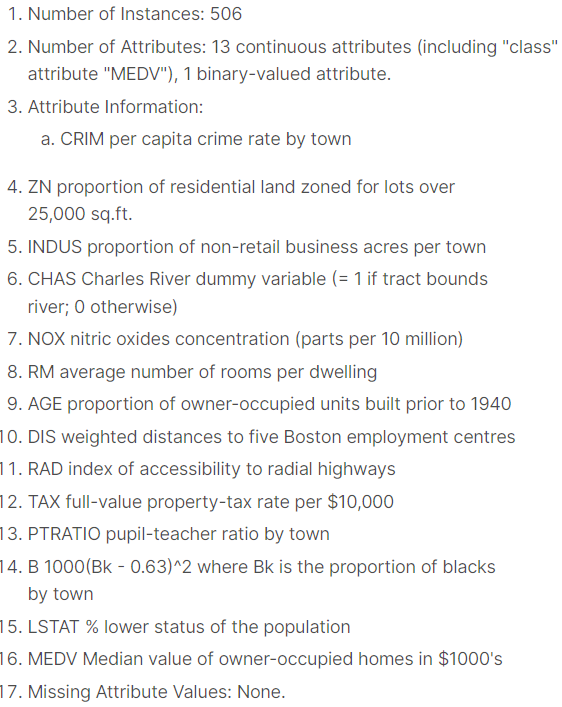

Ya que pudimos ver que contienen nuestros data-sets, podemos diferenciar nuestras características de nuestra variable dependiente.  
Lo que queremos saber es el precio de la vivienda (```MEDV```), todo lo demás son características que nos pueden ayudar a encontrar y predecir esta variable.

### Información Sobre los Datasets

Ya que sabemos que características contiene cada data-set, ahora nos interesa que tipo de dato guarda en cada columna, así como saber la cantidad de NaN's que se encuentran en nuestros sets.

In [ ]:
real_state_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


Este data-set tiene la característica de que no hay valores nulos considerables, solamente hay 5 en la característica de ```RM```. Esto nos ayudará mucho en la limpieza de dichos datos.

### Estadística Descriptiva del DF

Ahora vamos a sacar unas métricas estadísticas para poder tener aún más contexto y analizar de mejor forma nuestros datos.

In [ ]:
real_state_full_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


Estas métricas nos ayudan ya que nos dan una idea de qué hacer con los datos, de dónde salieron, cuáles son los valores esperados de cada característica, etc.

### Búsqueda de Correlaciones

Esta información es más directa a nuestros modelos de machine learning ya que un coeficiente de correlación nos indica de una forma matemática que características son más importantes para meter en nuestros modelos y que características no tendrán tanto peso.

In [ ]:
# Matriz de Correlación
corr = real_state_full_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220363,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030,-0.380072
ZN,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307812,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029,0.339767
INDUS,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.392193,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707,-0.463269
CHAS,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089952,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013,0.164782
NOX,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301778,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050,-0.411486
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.237335,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994,-0.368203
DIS,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.199853,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063,0.233469
RAD,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.213078,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389,-0.379016
TAX,0.583389,-0.311531,0.718764,-0.034244,0.666982,-0.293969,0.503360,-0.530379,0.910211,1.000000,0.440962,-0.440830,0.482088,-0.459274


<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


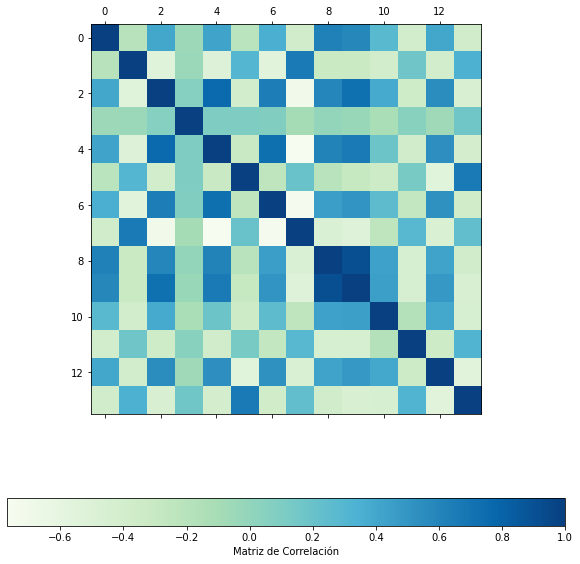

In [ ]:
# Heat Map de Correlación
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.matshow(corr, cmap = 'GnBu')
plt.colorbar(label='Matriz de Correlación', orientation="horizontal")
plt.show()

Curiosamente, todas las características tienen una correlación importante con nuestra variable dependiente, lo que significa que nuestros modelos de machine learning van a ser muy confiables si les ponemos todos estos datos.

## Limpieza de Datos

Ya que se hizo un análisis del data-set, tenemos una idea clara de la naturaleza de los datos, así que podemos empezar a limpiar a los datos.

### Eliminando los Valores Nulos

Cuando se habla de limpieza de datos, normalmente se habla de qué hacer con los valores nulos ya que no se puede hacer cálculos correctos con estos datos presentes.  
Debido a la naturaleza de este data-set, no es necesario hacer mucho para limpiar.  
Lo que se va a hacer es eliminar las filas que cuentan con valores nulos. Como solamente son 5 filas, podemos hacer este procedimiento sin riesgo.

In [ ]:
real_state_full_data_clean = real_state_full_data.dropna().reset_index(drop=True)
real_state_full_data_clean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
502,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
503,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
504,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


Con los datos ya limpios, podemos sacar nuevamente nuestra matriz de correlación para poder asegurarnos que ninguna característica haya cambiado mucho su correlación.

In [ ]:
corr = real_state_full_data_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199418,0.406479,-0.056024,0.420170,-0.220363,0.352817,-0.377904,0.625407,0.582884,0.278265,-0.383363,0.406266,-0.381994
ZN,-0.199418,1.000000,-0.536888,-0.041824,-0.517737,0.307812,-0.567952,0.666410,-0.309652,-0.312901,-0.394101,0.176625,-0.390730,0.339327
INDUS,0.406479,-0.536888,1.000000,0.061746,0.762864,-0.392193,0.644182,-0.709589,0.594344,0.718784,0.378739,-0.357787,0.558093,-0.466094
CHAS,-0.056024,-0.041824,0.061746,1.000000,0.090200,0.089952,0.086664,-0.097049,-0.006803,-0.035770,-0.124780,0.050143,-0.056881,0.164175
NOX,0.420170,-0.517737,0.762864,0.090200,1.000000,-0.301778,0.730640,-0.770167,0.609839,0.665914,0.185864,-0.379523,0.540542,-0.412974
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.352817,-0.567952,0.644182,0.086664,0.730640,-0.237335,1.000000,-0.748698,0.456212,0.505186,0.261170,-0.273739,0.528674,-0.366717
DIS,-0.377904,0.666410,-0.709589,-0.097049,-0.770167,0.199853,-0.748698,1.000000,-0.491789,-0.530665,-0.237141,0.291309,-0.470697,0.235206
RAD,0.625407,-0.309652,0.594344,-0.006803,0.609839,-0.213078,0.456212,-0.491789,1.000000,0.910898,0.441336,-0.441338,0.424516,-0.382068
TAX,0.582884,-0.312901,0.718784,-0.035770,0.665914,-0.293969,0.505186,-0.530665,0.910898,1.000000,0.442510,-0.439917,0.483227,-0.461959


No hubo ningún cambio drástico ni importante, así que nuestro plan general de meter todas las características sigue en pie.

### Escalamiento de los datos

Con todo el contexto que pudimos obtener acerca de los datos, ya podemos separar con seguridad nuestros datos en diferentes data-set para diferenciar entre la variable dependiente y la variable independiente.

In [ ]:
# Separacion de datos
real_state_x = real_state_full_data_clean.drop(['MEDV'], axis=1)
real_state_y = real_state_full_data_clean["MEDV"]

Ya que se separaron los datos, lo que necesitamos hacer es escalarlos y debido a la naturaleza de los métodos de optimización, es más fácil para los modelos implementados encontrar una convergencia cuando se escalan los datos.

In [ ]:
# Escalamiento
escalador = StandardScaler()
escalador.fit(real_state_x)
real_state_x_scaled = pd.DataFrame(escalador.transform(real_state_x))

### Modularización del data-set

Por buena práctica, es necesario modularizar nuestro conjunto de datos en 3 partes: entrenamiento, validación y pruebas.

Ya que no contamos con datos para hacer pruebas, solamente haremos 2 módulos: entrenamiento y evaluación.

(Nuestro módulo para validación tiene de nombre 'test', esto es por el nombre de la función que estamos utilizando, sin embargo, no se refiere a las pruebas)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(real_state_x_scaled, real_state_y,
                                                    random_state= 2)

## Modelos de Predicción

Ya con nuestros datos completamente limpios y preprocesados, es hora de empezar a jugar con modelos de machine learning, hiperparámetros, validaciones, etc.  
  
*(Todos nuestros modelos fueron objeto de experimento para encontrar la mejor combinación de hiperparámetros a nuestra discreción)*

### Regresión linear

Empezaremos con uno de los modelos de inteligencia artificial más sencillos, que es regresión linear, para ver qué tanto nos puede ayudar en este problema.

In [ ]:
linear_regression_price = LinearRegression()
linear_regression_price.fit(x_train, y_train)

print("My training score:", linear_regression_price.score(x_train, y_train))
print("My test score:", linear_regression_price.score(x_test, y_test))

My training score: 0.6557989255840285
My test score: 0.39993301428033345


Este modelo resultó no ser el indicado para calcular de forma correcta la variable dependiente. Puede ser que con un modelo más complejo pueda haber un resultado diferente.

### Árboles de Decisión

#### Creación del árbol

Los árboles de decisión llegan a ser muy propensos al overfitting, es por esto que tenemos que experimentar mucho con los hiperparámetros con los que cuenta.  
  
Asimismo, los hiperparámetros no cuenta con una fórmula mágica para escoger los mejores, y más con los árboles de decisión, es por eso que la experimentación y llegar a un equilibrio es muy importante.

In [ ]:
# Creacion de arbol base
decision_tree_price = tree.DecisionTreeRegressor(random_state=0,
                                                 max_depth=15)
decision_tree_price.fit(x_train, y_train)

print("Antes de podar", "-" * 50)
print("My training score:", decision_tree_price.score(x_train, y_train))
print("My test score:", decision_tree_price.score(x_test, y_test))
print("Depth", decision_tree_price.tree_.max_depth)

# Obtencion de alfa para podar
pruning_data = decision_tree_price.cost_complexity_pruning_path(x_train, y_train)

# Variables para guardar el mejor alfa y el mejor puntaje
best_alpha = 0
best_score = 0

# Probando todas las alfas
for alpha in pruning_data.ccp_alphas:
  decision_tree_try = tree.DecisionTreeRegressor(random_state=0,
                                                 max_depth=15,
                                                 ccp_alpha=alpha)
  decision_tree_try.fit(x_train, y_train)

  if decision_tree_try.score(x_test, y_test) > best_score:
    best_score = decision_tree_try.score(x_test, y_test)
    best_alpha = alpha

# Nuevo arbol con la mejor alfa
decision_tree_price = tree.DecisionTreeRegressor(random_state=0,
                                                 max_depth=15,
                                                 ccp_alpha=best_alpha)
decision_tree_price.fit(x_train, y_train)

print("Despues de podar", "-" * 50)
print("My training score:", decision_tree_price.score(x_train, y_train))
print("My test score:", decision_tree_price.score(x_test, y_test))
print("Depth", decision_tree_price.tree_.max_depth)

Antes de podar --------------------------------------------------
My training score: 0.9966018265129443
My test score: 0.827066070545076
Depth 15
Despues de podar --------------------------------------------------
My training score: 0.9490311953623507
My test score: 0.8464869239450252
Depth 9


Nuestro valor alfa básicamente nos dice que partes del árbol "podar", esto para ayudar a generalizar mejor.  
Debido a que se nos devolvió una gran cantiddad de alfas, tuvimos que probarlas todas.  
Al final de este proceso, nuestro puntaje fue bastante alto.

#### Gráficos

Para poder visualizar mejor este modelo, podemos graficarlo con diferenres representaciones. Esto nos ayuda a ver como funciona el árbol y sus valores.

In [ ]:
print(tree.export_text(decision_tree_price))

|--- feature_12 <= -0.99
|   |--- feature_5 <= 1.59
|   |   |--- feature_6 <= 0.92
|   |   |   |--- feature_5 <= 0.72
|   |   |   |   |--- feature_12 <= -1.07
|   |   |   |   |   |--- value: [29.58]
|   |   |   |   |--- feature_12 >  -1.07
|   |   |   |   |   |--- value: [25.40]
|   |   |   |--- feature_5 >  0.72
|   |   |   |   |--- value: [34.00]
|   |   |--- feature_6 >  0.92
|   |   |   |--- value: [50.00]
|   |--- feature_5 >  1.59
|   |   |--- feature_6 <= 0.43
|   |   |   |--- feature_9 <= -0.88
|   |   |   |   |--- value: [47.57]
|   |   |   |--- feature_9 >  -0.88
|   |   |   |   |--- value: [43.04]
|   |   |--- feature_6 >  0.43
|   |   |   |--- value: [50.00]
|--- feature_12 >  -0.99
|   |--- feature_12 <= 0.26
|   |   |--- feature_5 <= 1.11
|   |   |   |--- feature_7 <= -1.22
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  -1.22
|   |   |   |   |--- feature_12 <= -0.65
|   |   |   |   |   |--- feature_7 <= 0.33
|   |   |   |   |   |   |--- feature_2 <= -0.

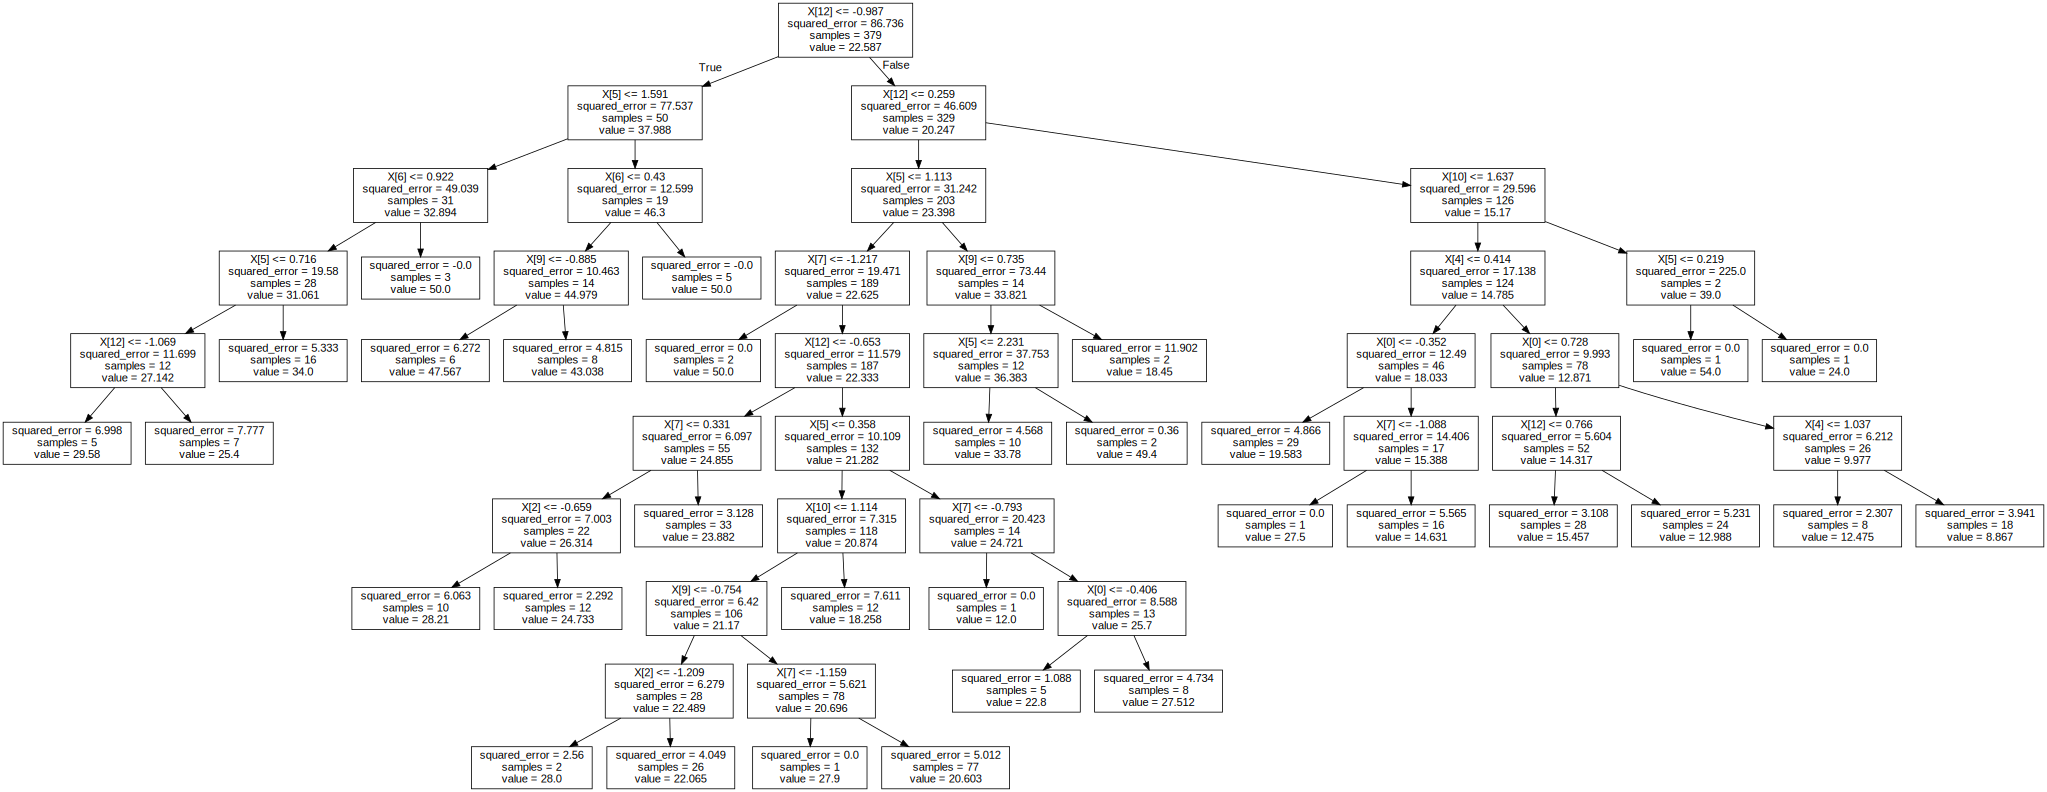

In [ ]:
decision_tree_price_data = tree.export_graphviz(decision_tree_price)
graph_price_Data = graphviz.Source(decision_tree_price_data)
graph_price_Data

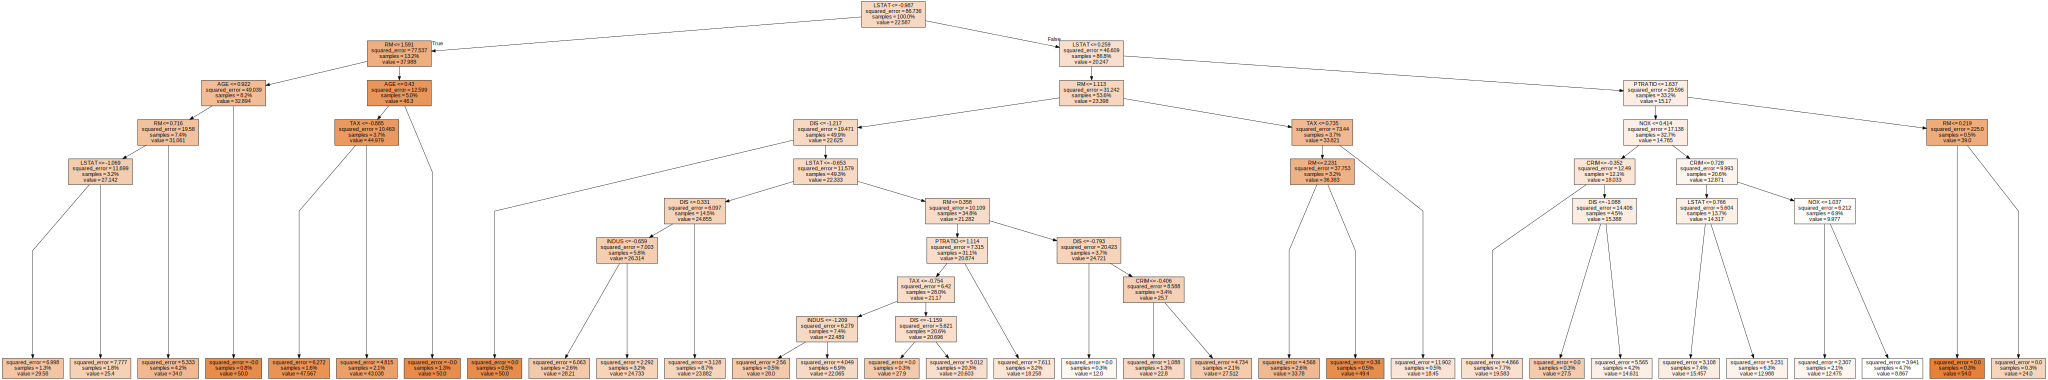

In [ ]:
feature_names = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
decision_tree_noNaN_data = tree.export_graphviz(decision_tree_price, feature_names=feature_names, leaves_parallel=True,
filled=True, proportion=True, rotate=False)
graph_noNaN_Data = graphviz.Source(decision_tree_noNaN_data)
graph_noNaN_Data

### Bosques aleatorios

Aunque nuestro modelo de árbol de decisión tuvo una muy buena puntuación, podemos intentar mejorar esta puntuación con un bosque aleatorio.

In [ ]:
random_forest_price = RandomForestRegressor(random_state=0,
                                            max_depth=15)

random_forest_price.fit(x_train, y_train)

print("My training score:", random_forest_price.score(x_train, y_train))
print("My test score:", random_forest_price.score(x_test, y_test))

My training score: 0.97455074388028
My test score: 0.8380352704099377


Debido a la naturaleza del bosque aleatorio y cómo se comporta para evitar el overfitting, al momento de querer bajar la complejidad del mismo también se baja el puntaje de validación.  
Se intentó con diferentes parámetros como ```min_samples_leaf```, ```max_depths```, ```min_impurity_decrease```, ```max_features```, todo para bajar la complejidad, sin embargo, cada que bajaba, el puntaje de evaluación no subía.

### Redes neuronales

Es turno de uno de los modelos más robustos y consistentes de machine learning, las redes neuronales.
Este modelo cuenta con una gran cantidad de hiperparámetros, así que es necesario tener paciencia para poder obtener una red neuronal funcional.

In [ ]:
neural_network_price = MLPRegressor(random_state=0,
                                    hidden_layer_sizes=(10, 10),
                                    solver='adam',
                                    learning_rate='adaptive',
                                    max_iter=1000000)
neural_network_price.fit(x_train, y_train)
print("My training score:",neural_network_price.score(x_train, y_train))
print("My test score:",neural_network_price.score(x_test, y_test))

My training score: 0.936961059009023
My test score: 0.8157567319404564


Aunque la documentacion de scikit learn dice que el metodo de optimización ```lbfgs``` es el mejor para data-sets pequeños como el nuestro, ```adam``` resultó mejor en este caso.  
Asimismo, se utilizó una tasa de aprendizaje ```adaptive``` ya que esto ayuda a que se encuentre la convergencia más fácil debido a que la tasa ya no es estática, y se aumenta o disminuye según se necesite.  
Por último, hubo mucha experimentación en cuestión a las capas ocultas de la red neuronal. Descubrimos que esta fue la mejor combinación de neuronas.

## Comparación de modelos

Los modelos que se utilizaron fueron todos diferentes, teniendo sus ventajas y desventajas.  
Sin embargo, el mejor por puntaje fue el árbol de decisión.  

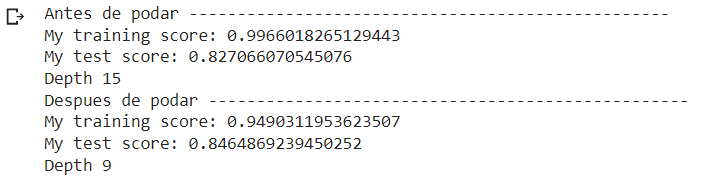

## Conclusión

Para poder crear un modelo de machine learning, no solamente se tiene que poner los datos a una biblioteca y esperar lo mejor. Se tiene que hacer una limpieza de estos, un preprocesamiento, afinar los modelos, cada uno con un comportamiento diferente, saber la mejor forma de afinarlos y tener mucha paciencia.  
Para que un modelo sea robusto se tiene que probar otros modelos para garantizar que se esta utilizando el mejor.